# Start FastAPI app

```sh

uvicorn api.app:app --reload --host 0.0.0.0 --port 8000
```

In [24]:
import requests
import time

response = requests.get("http://localhost:8000/local/models")
print(response.json())

{'models': [{'title': 'v1-5-pruned-emaonly.safetensors [6ce0161689]', 'model_name': 'v1-5-pruned-emaonly', 'hash': '6ce0161689', 'sha256': '6ce0161689b3853acaa03779ec93eafe75a02f4ced659bee03f50797806fa2fa', 'filename': '/stable-diffusion-webui/models/Stable-diffusion/v1-5-pruned-emaonly.safetensors', 'config': None}]}


In [27]:
response = requests.post("http://localhost:8000/local/images", json={"prompt": "A fantasy landscape, trending on artstation"})
print(response.json())

{'image_id': '56558e00-4cf6-4f4e-901d-a0412bb8df8c', 'status': 'queued', 'url': None}


In [23]:
max_retries = 10

while True:
    job_id = response.json()["image_id"]
    status_response = requests.get(f"http://localhost:8000/image/{job_id}")

    if status_response.status_code != 200:
        print(f"Error fetching status: {status_response.status_code}")
        break

    if max_retries <= 0:
        print("Max retries reached. Exiting.")
        break
    max_retries -= 1
    # Wait before polling again
    
    time.sleep(5)

Error fetching status: 500


In [ ]:
print(status_response.text)

�PNG

IHDR        �?1  htEXtparameters A fantasy landscape, trending on artstation comical sketch on paper technical details, highly detailed, high resolution
Negative prompt: photo, painting, cartoon, realistic, portrait, face, colored, 3d, naked, realism, real, hair, closeup, closeup shot, lowres, text, error, cropped, worst quality, low quality, jpeg artifacts,ugly, duplicate, morbid, mutilated, out of frame, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mu


In [64]:
response = requests.post("http://localhost:8000/local/images2", 
                         json={"prompt": "A fantasy landscape, trending on artstation"})
print(response.json())

{'detail': 'Error contacting Stable Diffusion API: {"error":"HTTPException","detail":"Sampler not found","body":"","errors":""}'}


In [39]:
resp.json()

[{'title': 'v1-5-pruned-emaonly.safetensors [6ce0161689]',
  'model_name': 'v1-5-pruned-emaonly',
  'hash': '6ce0161689',
  'sha256': '6ce0161689b3853acaa03779ec93eafe75a02f4ced659bee03f50797806fa2fa',
  'filename': '/stable-diffusion-webui/models/Stable-diffusion/v1-5-pruned-emaonly.safetensors',
  'config': None}]

In [50]:
response = requests.post("http://localhost:8000/local/images", json={"prompt": "A fantasy landscape, trending on artstation"})
print(response.json())

{'image_id': 'ede0834a-3262-4b6b-a23d-019646d92baf', 'status': 'queued', 'url': None}


In [60]:
response = requests.post("http://localhost:7860/sdapi/v1/txt2img", 
                         json={"prompt": "A fantasy landscape, trending on artstation", 
                               "sampler_name": "Euler a", 
                               "steps": 20, 
                               "cfg_scale": 7, 
                               "width": 256, 
                               "height": 256, 
                               "n_iter": 1, 
                               "batch_size": 1})
print(response.json())

{'images': ['iVBORw0KGgoAAAANSUhEUgAAAQAAAAEACAIAAADTED8xAAAAx3RFWHRwYXJhbWV0ZXJzAEEgZmFudGFzeSBsYW5kc2NhcGUsIHRyZW5kaW5nIG9uIGFydHN0YXRpb24KU3RlcHM6IDIwLCBTYW1wbGVyOiBFdWxlciBhLCBDRkcgc2NhbGU6IDcuMCwgU2VlZDogOTI2OTQxNDQ5LCBTaXplOiAyNTZ4MjU2LCBNb2RlbCBoYXNoOiA2Y2UwMTYxNjg5LCBNb2RlbDogdjEtNS1wcnVuZWQtZW1hb25seSwgVmVyc2lvbjogdjEuOS40BrpHUgABAABJREFUeJys/VmTbeuVHYaNMef3rbX3zszT3R49UCigCqi+YTUWKZGypDBFiQpadDgUpBzmg6wIhx0K+zf4H/jBDtvhRz9Y7kiXTVKiWGJXVSgWIIAoAIVbAC5uf+4597SZufde65tz+OFba+cBLdN0WAnEuedk7tzNWrMZc8w5x8df/a1/93DYOC0JxZjRRIBsQSiBAEBzqdFKzM1pmQ2AeZGoDCnN6F4zMxWkjIgIpeiODJCRCXKe9wBJVwbMFUkaJCAJCKKYgrlLAYB0CYQAY4JsBroXITNEikYaW87M2Uy1DEPZmW2Ph+eH4zO6uQ8ilHCvsJIxAzNhBMEiQRByJg1mrc00EuZeIcFo7iQywsyFJM28CBZxJOFuNFdSgFJSozFFKekFShoIkSa4Io2keWZEJgBzM7oyQWQ0KybJvEqKaEaCyEzS57mlUjHTZPQQzQyZbjQzspAotUZMZvBSYRZNZpaR0ZrXSkIJmgCmkjAIdJcAJcBsYUaaA5BkRghAAgQJkZSRAiNVSiEgQDApvJiiEZkCQHdDNtBSAZI0M8bcAJmbBClBASRAEGCClAgoE+YRYW5kKAJwKUgDQED992gQAGQkbfm20ZRBcyP7C5EwmpYv0GyxNAmEs5Qyl+t9abM56QWttQyRFkq

In [ ]:
# show image
import base64
from io import BytesIO
from IPython.display import display, Markdown
image_data = response.json()["images"][0]
image_bytes = base64.b64decode(image_data)
image = BytesIO(image_bytes)
display(Markdown("![Generated Image](data:image/png;base64,{})".format(image_data)))

TypeError: a bytes-like object is required, not 'str'

In [44]:
response = requests.get("http://localhost:8000/local/models")
print(response.json())

{'models': [{'title': 'v1-5-pruned-emaonly.safetensors', 'model_name': 'v1-5-pruned-emaonly', 'hash': None, 'sha256': None, 'filename': '/stable-diffusion-webui/models/Stable-diffusion/v1-5-pruned-emaonly.safetensors', 'config': None}]}


In [12]:
status_response.headers

{'date': 'Fri, 19 Sep 2025 12:54:51 GMT', 'server': 'uvicorn', 'content-type': 'image/png', 'accept-ranges': 'bytes', 'content-length': '129639', 'last-modified': 'Fri, 19 Sep 2025 12:54:49 GMT', 'etag': '"1185c6feb5aa9476db316324000b30e7"'}

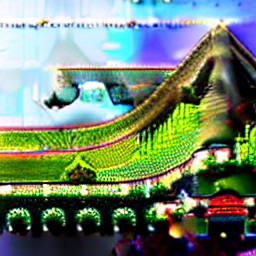

In [19]:
# show image
import base64
from io import BytesIO
from IPython.display import display, Markdown
#  image from status_response content-type: image/png
image_data = status_response.content
b64_string = base64.b64encode(image_data).decode('utf-8')
image = BytesIO(base64.b64decode(b64_string))
display(Markdown("![Generated Image](data:image/png;base64,{})".format(b64_string)))

In [18]:
print(status_response.content)

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x00\x00\x00\x01\x00\x08\x02\x00\x00\x00\xd3\x10?1\x00\x00\x03htEXtparameters\x00A fantasy landscape, trending on artstation comical sketch on paper technical details, highly detailed, high resolution\nNegative prompt: photo, painting, cartoon, realistic, portrait, face, colored, 3d, naked, realism, real, hair, closeup, closeup shot, lowres, text, error, cropped, worst quality, low quality, jpeg artifacts,ugly, duplicate, morbid, mutilated, out of frame, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry, dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, fused fingers, too many fingers, long neck, username, watermark, signature\nSteps: 30, Sampler: Euler a, CFG scale: 8.0, Seed: 639463740, Size: 256x256, Model hash: 6ce0161689, Model: v1-5-pruned-emaonly, Version: v1.9.4\xf3\x1